Engy-5310: Computational Continuum Transport Phenomena Fall 2021 UMass Lowell; Prof. V. F. de Almeida **18Sep21**

# Homework 02 (21Sep21)

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

### Name: `your name`

### Rubric for each assignment: 

|       Context               |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file in the Blackboard submission portal as: 
   </span> 
   
   **lastname-firstname-labwork-xx.ipynb**

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (45 pts)](#a1) Function approximation with Wavelets basis functions at collocation points.
 - [1.1)](#a11)(5 pts) Generate the target function.
 - [1.2)](#a12)(20 pts) Compute parameters for a given error level.
 - [1.3)](#a13)(10 pts) Plot the residual function and analyze it.
 - [1.4)](#a14)(10 pts) Demonstrate *numerically* the residual is a minimum.
* [Assignment 2 (40 pts)](#a2) Function approximation with Wavelets basis functions.
 - [2.1)](#a21)(30 pts) Using the same basis functions, approximate the target function continuously ($m\rightarrow\infty$).
 - [2.2)](#a22)(10 pts) Demonstrate *numerically* the residual is a minimum.
* [Assignment 3 (5 pts)](#a3) .
---

## <span style="color:blue">[Assignment 1 (45 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa)(5 pts) Generate the following piecewise linear function on these shape points:</span>
<br>
<span style="color:blue">
  $\{(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)\}$.
</span><a id="a11"></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy.linalg import solve, norm
from scipy.integrate import quad_vec
from scipy.integrate import quad
from numpy.linalg import matrix_rank
import math
import scipy

In [2]:
shape_pts=np.array([(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)])

x = shape_pts[:,0]
y = shape_pts[:,1]

x_min=shape_pts[:,0][0]
x_max=shape_pts[:,0][-1]

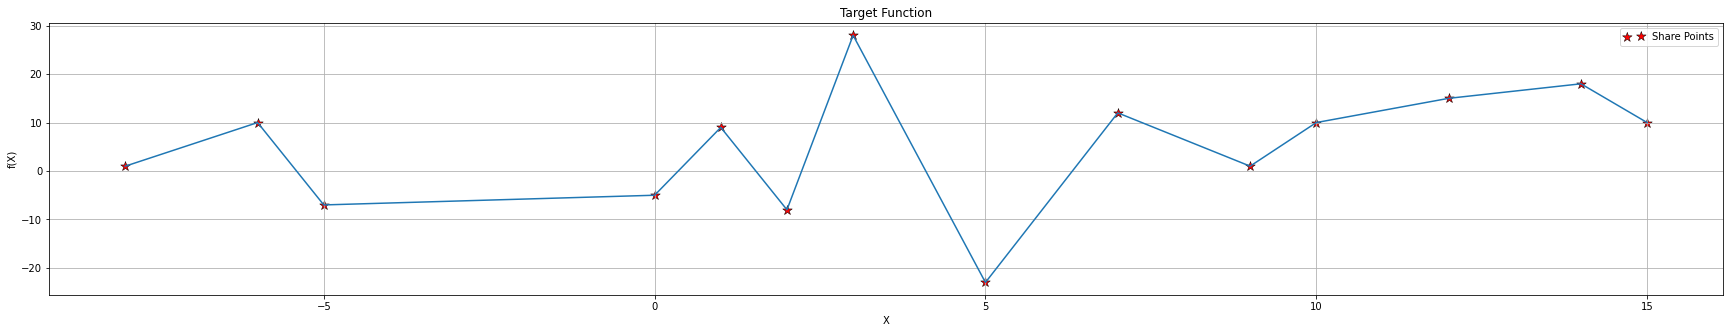

In [3]:
'''Generate the target function f'''

%matplotlib inline
def TargetFunction(x,y,markersize):
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(5)
    plt.plot(x,y)
    p1=plt.scatter(x,y,marker = '*',s=markersize,edgecolors = 'black', linewidth=.5,c = 'red')
    plt.legend([p1],['Share Points'],scatterpoints=2,loc ="upper right")
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.title('Target Function')
    plt.rcParams.update({'font.size': 18})
    plt.grid()
    return plt


f = TargetFunction(x,y,markersize = 100)



### <span style="color:blue">[1.2)](#toa)(20 pts) Compute "the best" approximant function $g$ using Wavelet basis functions with adequate parameters to approximate $f$ with a relative $L_2$ norm below 30% error; use a small number of collocation points as you are able to. Report the number of packets, modes, and other parameters used, show a comparison plot, compute the $L_2$ norm relative error, and explain mathematically in what sense is your approximant the best.
</span><a id="a12"></a>

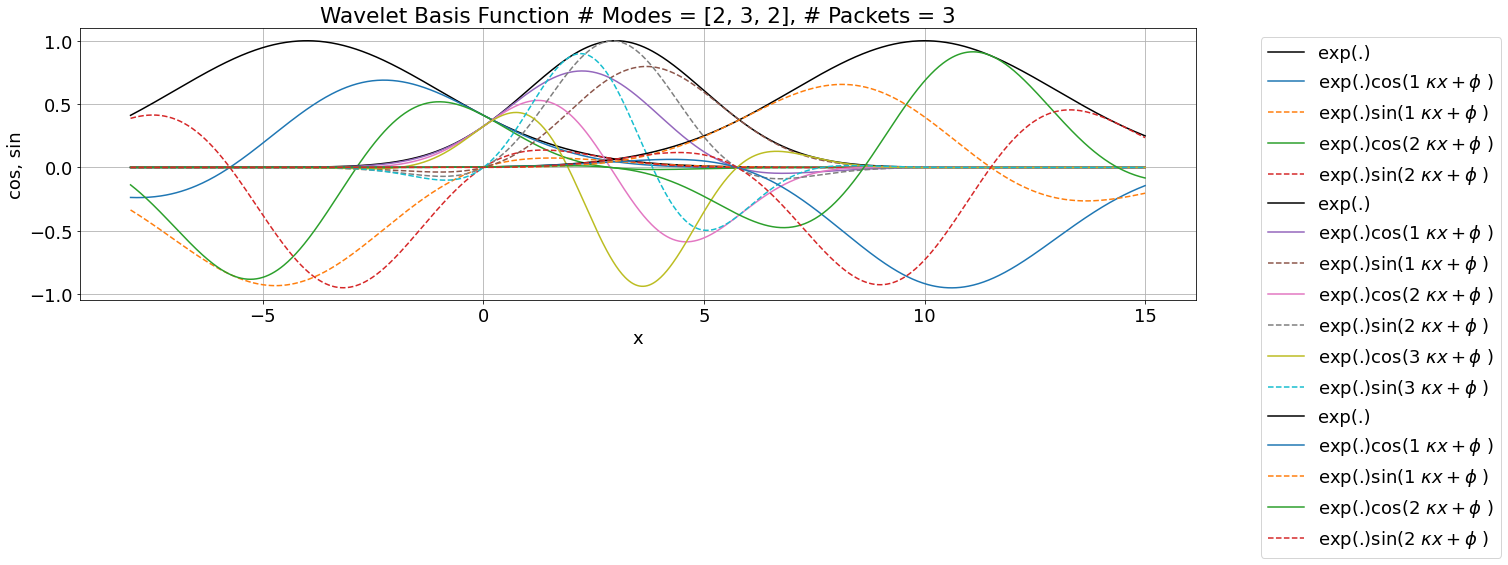

In [4]:
'''Build the basis functions'''
#-------------------------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------------------------------------------------#
m = 1000
x_min = shape_pts[:,0][0]
x_max = shape_pts[:,0][-1]


x_new = np.linspace(x_min,x_max,m)

def WaveletBasis(x_new, kappa, bunch_pts, N, sigma, phase_shift, points_n):
    A = np.zeros((points_n,int(sum(N)* 2 + len(N))))

    j=0
    for i, modes in enumerate(N):
        sig = sigma[i]
        p = bunch_pts[i]
        first_col = int(sum(N[:i]))*2+i
        A[:,first_col] = np.exp(-((x_new-p)**2)/(2*(sig**2)))
        #print(np.exp(-((x_new-p)**2)/(2*(sig**2))))
        for mode_num in range(modes):
            column = first_col + (mode_num*2) + 1
            j = mode_num + 1
            #points = (())
            A[:,column] = np.exp(-((x_new-p)**2)/(2*(sig**2)))*(np.cos(j*kappa*x_new + (phase_shift*x_new**2)/2))
            A[:,column+1] = np.exp(-((x_new-p)**2)/(2*(sig**2)))*((np.sin(j*kappa*x_new + (phase_shift*x_new**2)/2)))
    return np.array(A)

def Single_wavebasis(x,bunch_pts,phase_shift,sigma,j):
    #Z_b=np.zeros((len(x),2*N+1))
    #for j in range((2*N+1)):
    if (j==0):
        mat=np.exp( -((x - bunch_pts)**2)/2*sigma**2)
    elif (j%2)==1:
        mat=(np.exp( -((x - bunch_pts)**2)/2*sigma**2))*((np.cos(((j//2)+1)*Kappa*x)+(phase_shift*(x**2)*0.5)))
    elif (j%2)==0:
        mat=(np.exp(-((x - bunch_pts)**2)/2*sigma**2))*((np.sin(((j//2)+1)*Kappa*x)+(phase_shift*(x**2)*0.5)))
    return mat






def index_hand(p):
    t0=0
    if p>=1:
        for i in range(p):
            t0=t0+(2*N[i]+1)
    return t0


#-------------------------------------------------------------------------------------------------------------------------------------------------#
m = 1000
N = [2, 3, 2]
bunch_pts = [-4, 3, 10]
sigma = [3, 2, 3]
phase_shift = 0
P = len(N)

x_min = shape_pts[:,0][0]
x_max = shape_pts[:,0][-1]
wavelength = x_max - x_min
x_new = np.linspace(x_min,x_max,m)

Kappa = (2*math.pi)/wavelength

#-------------------------------------------------------------------------------------------#
A = WaveletBasis(x_new, Kappa, bunch_pts, N, sigma, phase_shift,m)

#-------------------------------------------------------------------------------------------#


def plotWavelet(N,bunch_pts,phase_shift,sigma,kappa,x_min,x_max,x,y,m):

    #num_plotting_pts = 1000
    x_new = np.linspace(x_min, x_max, m)
    A = WaveletBasis(x_new, kappa, bunch_pts, N, sigma, phase_shift,m)

    fig = plt.figure(figsize=(20, 5))
    ax = plt.subplot(111)

    plt.grid()
    plt.title(f"Wavelet Basis Function # Modes = {N}, # Packets = {len(N)}")
    plt.xlabel('x'); plt.ylabel('cos, sin')
    for i, modes in enumerate(N):
        first_col = int(sum(N[:i])) * 2 + i
        plt.plot(x_new, A[:, first_col], "k-", label="exp(.)")
        for modeNum in range(modes):
            # Iterates through an individual packet
            column = first_col + (modeNum) * 2 + 1

            k = modeNum + 1

            plt.plot(x_new, A[:, column],'-' ,label=r"exp(.)cos(%i $\kappa x + \phi$ )" % k)
            plt.plot(x_new, A[:, column + 1],'--' ,label=r"exp(.)sin(%i $\kappa x + \phi$ )" % k)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return plt.show()
    
    
plotWavelet(N, bunch_pts, phase_shift, sigma, Kappa, x_min, x_max, x, y, m)

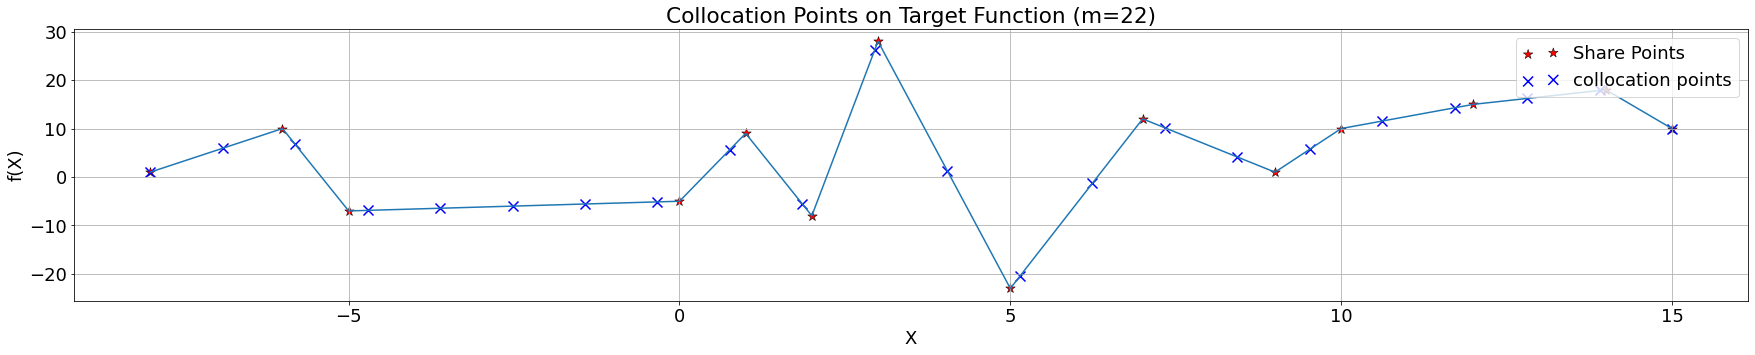

In [28]:
'''Collocation abscissa points'''
x_min = shape_pts[:,0][0]
x_max = shape_pts[:,0][-1]
m = 22
assert m >= len(shape_pts)

u = interpolate.interp1d(x, y, kind='linear',fill_value='array-like')
x_coll = np.linspace(x_min, x_max, m)

y_new = u(x_coll)


markersize = 100
#---------------------------------------------------------------------------------------#
def genCollocationPts(x,y,x_tilde_pts):
    slopeList = []
    interceptList = []
    for i in range(1, len(x)):
        slope = (y[i] - y[i - 1]) / (x[i] - x[i - 1])
        intercept = y[i] - (slope * x[i])
        slopeList.append(slope)
        interceptList.append(intercept)

    y_tilde_pts = []
    for i in range(len(x_tilde_pts)):
        result = np.where(x <= x_tilde_pts[i])
        x_tildeLoc = result[-1][-1]
        if x_tildeLoc >= len(slopeList):
            x_tildeLoc = len(slopeList) - 1
        y_tilde = x_tilde_pts[i] * slopeList[x_tildeLoc] + interceptList[x_tildeLoc]
        y_tilde_pts.append(y_tilde)
    return(np.asarray(y_tilde_pts))

#---------------------------------------------------------------------------------------#

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x,y)
p1 = plt.scatter(x, y, marker = '*',s = markersize, edgecolors = 'black', linewidth=.5,c = 'red')
p2 = plt.scatter(x_coll,y_new, marker = 'x',s = markersize,c='blue')
plt.legend([p1,p2],['Share Points','collocation points'],scatterpoints=2,loc ="upper right")
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title(f'Collocation Points on Target Function (m={m})')
plt.rcParams.update({'font.size': 18})
plt.grid()

In [6]:
'''Build the basis functions collocation matrix'''

#-------------------------------------------------------------------------------------------------------------------#
#Function defined:
def evaluation(x_coll):
    a_tilde_mtrx = WaveletBasis(x_coll, Kappa, bunch_pts, N, sigma, phase_shift,m)
    return np.array(a_tilde_mtrx)
#------------------------------------------------------------------------------------------------------------------#

a_tilde_mtrx = evaluation(x_coll)

if a_tilde_mtrx.shape[0] > a_tilde_mtrx.shape[1]:
    print('A is overdetermined.')
elif a_tilde_mtrx.shape[0] < a_tilde_mtrx.shape[1]:
    print('A is underdetermined.')  
else:
    print('A is determined.')



if np.linalg.matrix_rank(a_tilde_mtrx) == min(a_tilde_mtrx.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')


A is overdetermined.
A is full rank.


In [7]:
'''Build target function vector at the collocation points'''

u = interpolate.interp1d(x, y, kind='linear',fill_value='array-like')
x_coll = np.linspace(x_min, x_max, 22)

y_new = u(x_coll)
f_tilde_vec = np.array(y_new)


In [8]:
'''Compute optimal coefficient vector'''

if np.linalg.matrix_rank(a_tilde_mtrx) == min(a_tilde_mtrx.shape):
    print('A is full rank; solve for least squares.')
    
    c_tilde_star_vec = solve(a_tilde_mtrx.transpose()@a_tilde_mtrx, a_tilde_mtrx.transpose()@f_tilde_vec)
else:
    print('A is rank deficient; solve for shortest least squares')
    c_tilde_star_vec = universal_solve(a_tilde_mtrx.transpose()@a_tilde_mtrx, a_tilde_mtrx.transpose()@f_tilde_vec,
                                       pivot_tol=1e-9)

#TODO collect coefficients
print('')
print('c_tilde_star_vec:\n')
for j,c in enumerate(c_tilde_star_vec):
    if j == 0:
        print('a_%2i = %10.3e'%(j,c))
    elif j%2 == 0:
        k = j/2
        print('b_%2i = %10.3e'%(k,c))
    else:
        k = (j+1)/2
        print('a_%2i = %10.3e'%(k,c))


print('')        
print('||r^*||_2 = %10.3e'%(np.linalg.norm(a_tilde_mtrx@c_tilde_star_vec-f_tilde_vec)))


A is full rank; solve for least squares.

c_tilde_star_vec:

a_ 0 =  2.250e+03
a_ 1 =  6.661e+02
b_ 1 =  2.969e+03
a_ 2 = -7.314e+02
b_ 2 =  3.370e+02
a_ 3 = -2.412e+04
b_ 3 =  1.729e+04
a_ 4 =  3.037e+04
b_ 4 =  6.397e+03
a_ 5 = -1.179e+04
b_ 5 = -2.336e+03
a_ 6 =  2.585e+02
b_ 6 =  1.551e+02
a_ 7 =  1.193e+02
b_ 7 =  1.428e+02
a_ 8 = -1.642e+01
b_ 8 =  7.142e+01

||r^*||_2 =  1.020e+01


In [9]:
'''Build the best approximant function'''

def best_g_vec(x_new,c_tilde_star_vec,points_n):
    wav_mtrx = WaveletBasis(x_new, Kappa, bunch_pts, N, sigma, phase_shift, points_n)
    return wav_mtrx@c_tilde_star_vec



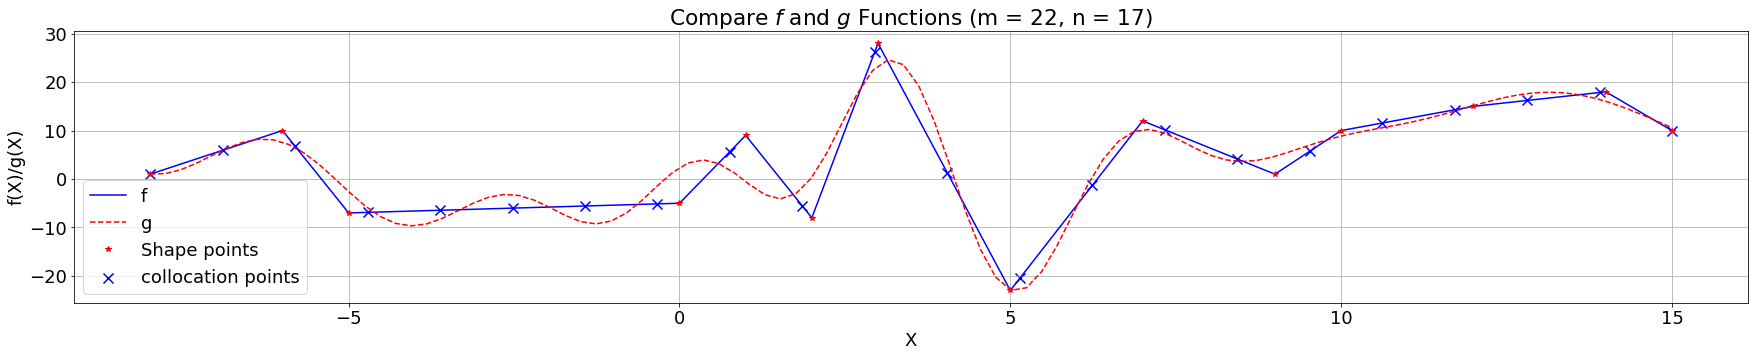

In [10]:
'''Plot comparison of f and g_best_vec'''

n=17
title=f'Compare $f$ and $g$ Functions (m = {22}, n = {n})'



points_n = max(2*m,100)
x_pts = np.linspace(x_min, x_max, points_n)
#------------------------------------------------------------------------------------------------#

bestg_vec_1 = best_g_vec(x_pts, c_tilde_star_vec,points_n)

def Comparison(x,y,markersize,points_n,title, bestg_vec_1):
    points_n = max(2*m,100)
    x_tilde_pts_new = np.linspace(x_min, x_max, points_n)
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(5)
    p1 = plt.plot(x,y,'b-', label = 'f')
    p2 = plt.plot(x_pts, bestg_vec_1, 'r--', label = 'g')
    p3 = plt.scatter(x_coll,y_new ,s=markersize, marker='x',c='blue', label = 'collocation points')
    plt.plot(shape_pts[:,0], shape_pts[:,1], '*', color='red',label='Shape points')
    plt.legend(loc ="best")
    plt.xlabel('X')
    plt.ylabel('f(X)/g(X)')
    plt.title(title)
    plt.rcParams.update({'font.size': 18})
    plt.grid()
    return plt

comparison = Comparison(x,y,markersize,points_n,title, bestg_vec_1)

In [11]:
'''L2 norm error'''


def f_integrand(x):
    return u(x)**2
f_integral = quad(f_integrand, x_min, x_max, limit=1000)
f_l2=np.sqrt(f_integral)

print('||f||_L2 =%10.6f'%f_l2[0])
print('quadrature error =%10.6e'%f_l2[1])

def g2_integrand(x):
    g_vec = best_g_vec(np.array([x]),c_tilde_star_vec,points_n)
    return g_vec**2
#f2 = np.vectorize(g2_integrand)

print('')

g2_integral, error = quad_vec(g2_integrand, x_min, x_max, limit=1000)
g2_integral_value_vect=np.sqrt(g2_integral)
print('||g||_L2 =', g2_integral_value_vect[0])
print('quadrature error =', error)

def f_minus_g_2_integrand(x):
    f_x = u(np.array([x]))
    g_vec = best_g_vec(np.array([x]),c_tilde_star_vec,points_n)
    return (f_x-g_vec)**2

print('')

f_minus_g_2_integral, error = quad_vec(f_minus_g_2_integrand, x_min, x_max, limit=1000)
f_minus_g_2_integral_vector = np.sqrt(f_minus_g_2_integral)
print('||f-g||_L2 =', f_minus_g_2_integral_vector[0])
print('quadrature error =', error)
r_err=(np.sqrt(f_minus_g_2_integral_vector[0])/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')
print(m)

||f||_L2 = 49.507575
quadrature error =5.392697e-03

||g||_L2 = 51.96323903751122
quadrature error = 5.432212227558998e-07

||f-g||_L2 = 13.41873895341935
quadrature error = 2.032230294813946e-06

Relative error =   7.399190 %
22


<span style="color:blue">**Explanation:**</span>
The relative error is really low, which is a significant indication that my assumption is correct.

### <span style="color:blue">[1.3)](#toa)(10 pts) Plot the residual function and analyze it.
</span><a id="a13"></a>

Positives at collocation pts =  12
Negatives at collocation pts =  10
Positives =  270
Negatives =  230


/tmp/ipykernel_33573/1357263023.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_coll, u(x_coll)-best_g_vec(x_coll,c_tilde_star_vec,22),'bx',label='collocation pts',color='red')


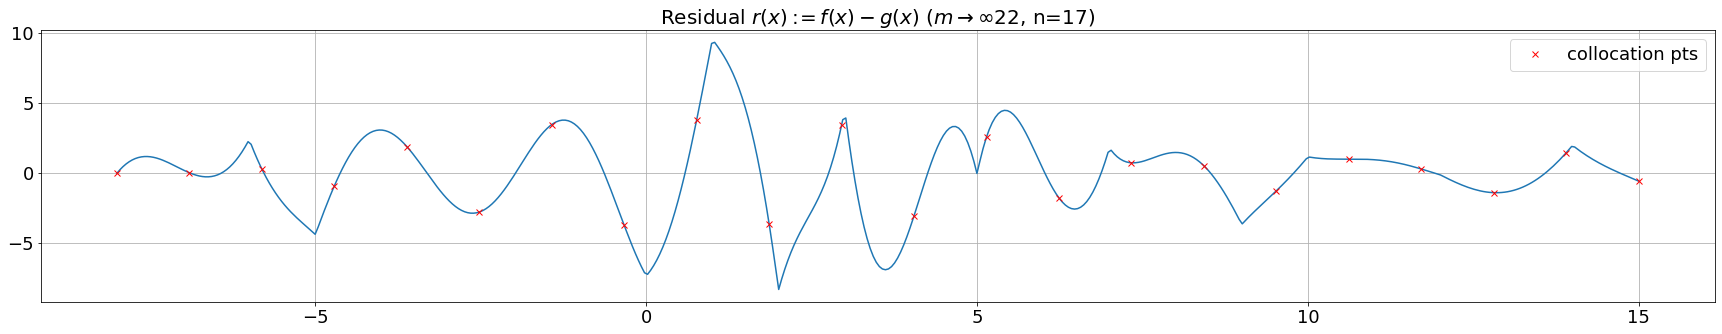

In [12]:
'''Residual of the best approximant'''
n_pts = max(3*22, 500)
x_pts = np.linspace(x_min, x_max, n_pts)


residual = u(x_pts) - best_g_vec(x_pts,c_tilde_star_vec,n_pts)
residual_collocation_pts = u(x_coll) - best_g_vec(x_coll,c_tilde_star_vec,22)
print('Positives at collocation pts = ', tuple([True for p in residual_collocation_pts if p>0]).count(True))
print('Negatives at collocation pts = ', tuple([True for p in residual_collocation_pts if p<0]).count(True))
print('Positives = ', tuple([True for p in residual if p>0]).count(True))
print('Negatives = ', tuple([True for p in residual if p<0]).count(True))
#print(g_best_vec_1) 
plt.figure(1, figsize=(30, 5))
plt.plot(x_pts, residual)
plt.plot(x_coll, u(x_coll)-best_g_vec(x_coll,c_tilde_star_vec,22),'bx',label='collocation pts',color='red')
plt.title(r'Residual $r(x) :\!\!= f(x) - g(x)$ ($m\rightarrow\infty$'+str(m)+', n='+str(len(a_tilde_mtrx[0]))+')', fontsize=20)

plt.rcParams.update({'font.size': 18})
plt.legend(loc='best')
plt.grid(True)
plt.show()

<span style="color:blue">**Analysis:**</span>
Because the positive and negative values are so near, the residue indicates that it is a good approximation ( evenly distributed). The residual is symmetric with relation to the abscissa axis, as indicated by this symbol. The residue plot, which displays nearly equal shoots on both sides with respect to '0,' demonstrates this symmetric character (i.e. symmetric distribution). Aside from that, the residual concentrates with higher values in the region of bigger jumps on the target function.

### <span style="color:blue">[1.4)](#toa)(10 pts) Demonstrate *numerically* that the residual is a minimum. Explain.
</span><a id="a14"></a>

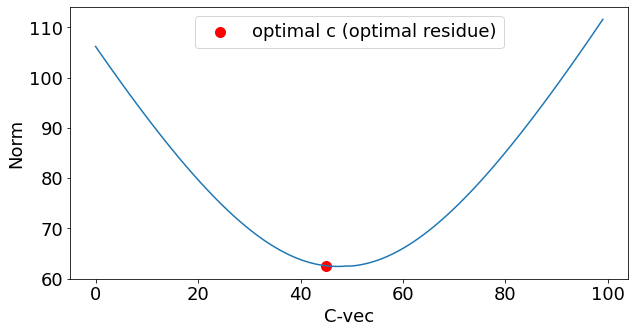

In [13]:
'''Code for minimum'''
increment = np.random.uniform(0,1,size = len(c_tilde_star_vec))
#print(increment)
norm1=[]

c_tilde_star_vec_new=np.zeros(len(c_tilde_star_vec))

for i in range (50):
    c_tilde_star_vec_new = c_tilde_star_vec+increment*0.1*i
    g_best_vec_i=best_g_vec(x_pts,c_tilde_star_vec_new,n_pts)
    resedue = u(x_pts)- best_g_vec(x_pts,c_tilde_star_vec_new,n_pts)
    norm1.append(norm((resedue)))
norm2=[]
c_tilde_star_vec_new2=np.zeros(len(c_tilde_star_vec))
for i in range (50):
    c_tilde_star_vec_new2 = c_tilde_star_vec-increment*0.1*i
    g_best_vec_i=best_g_vec(x_pts,c_tilde_star_vec_new2,n_pts)
    resedue = u(x_pts)-best_g_vec(x_pts,c_tilde_star_vec_new2,n_pts)
    norm2.append(norm((resedue)))
norm_das=norm2[::-1]
norm_das.extend(norm1)




plt.figure(1, figsize=(10, 5))
plt.plot(norm_das)
plt.xlabel("C-vec")
plt.ylabel("Norm")
plt.scatter(45,62.5,s=100,c='red',label='optimal c (optimal residue)')
plt.rcParams.update({'font.size': 18})
plt.legend(loc='best')
plt.show()

<span style="color:blue">**Explanation:**</span> 
I recalculated the residues after changing the C vectors. The residue varies as I modify the c vectors from their ideal value. And I've proven that my residue is minimal by plotting the norm of each residue.

## <span style="color:blue">[Assignment 2 (40 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa)(30 pts) Compute "the best" approximant function $g$ using wavelets basis functions with the same parameters as before; use a continuous approximation and compare to the results obtained earlier in 1.2). Does the error decrease? Why or why not?
</span><a id="a21"></a>

In [30]:
'''Build the Gram matrix'''
# N = [2,3,2]
# bunch_pts = [1, 0.5, 10]
# sigma = [1,0.5,0.5]


class wavBasisFunctionVec:
    """
    Creates a vector of basis functions that can be called as a list with the .func method
    
    """
    
    def __init__(self,bunch_pts,NList,shift,sigmas,kappa,x_min,x_max):
        self.num_eqns = int(sum(NList)*2+len(NList))
        self.func = []
        self.initBasisFuncs(bunch_pts,NList,shift,sigmas,kappa,x_min,x_max)
        
    def initBasisFuncs(self,bunch_pts,NList,shift,sigmas,kappa,x_min,x_max):

        for N_index, N in enumerate(NList):
            #Iterates through each packet

            #Location of the column where the packet starts
            baseColNum = int(sum(NList[:N_index]))*2+N_index

            #Initialize sigma and mean points for Gaussian
            sigma = sigmas[N_index]
            p = bunch_pts[N_index]
            
            #Bounding Gaussian Function
            def targetFunc(x,p=p,sigma=sigma):
                return(np.exp(-((x-p)**2)/(2*(sigma**2))))
            self.func.append(targetFunc)


            for modeNum in range(N):
                #Iterates through the rest of the packet

                #loc is col num where mode begins
                loc = baseColNum+(modeNum)*2 + 1

                #Calculates k value
                k = modeNum+1

                #Cosine Function
                def targetFunc(x,p=p,sigma=sigma,k=k,kappa=kappa,shift=shift):
                    return(np.exp(-((x-p)**2)/(2*(sigma**2)))*(np.cos(k*kappa*x + (shift*x**2)/2)))
                self.func.append(targetFunc)
                
                #Sine Function
                def targetFunc(x,p=p,sigma=sigma,k=k,kappa=kappa,shift=shift):
                    return(np.exp(-((x-p)**2)/(2*(sigma**2)))*(np.sin(k*kappa*x + (shift*x**2)/2)))
                self.func.append(targetFunc)

def genGramMtrx(NList,bunch_pts,shift,sigmas,kappa,x_min,x_max):
    phiVec = wavBasisFunctionVec(bunch_pts,NList,shift,sigmas,kappa,x_min,x_max)
    P = len(bunch_pts)
    num_eqns = int(sum(NList)*2+len(NList))
    gramMtrx = np.zeros((num_eqns,num_eqns))

    for N_index, N in enumerate(NList):
        baseColNum = int(sum(NList[:N_index]))*2+N_index
        sigma = sigmas[N_index]
        p = bunch_pts[N_index]
        for distToDiag in range(baseColNum+1):
            targetFunc = lambda x : np.exp(-((x-p)**2)/(2*(sigma**2))) * phiVec.func[distToDiag](x)
            gramMtrx[distToDiag,baseColNum] = scipy.integrate.quad(targetFunc,x_min,x_max,limit=100)[0]
        for modeNum in range(N):
            loc = baseColNum+(modeNum)*2 + 1

            k = modeNum+1            
            for distToDiag in range(loc+1):                
                targetFunc = lambda x : (np.exp(-((x-p)**2)/(2*(sigma**2)))*np.cos(k*kappa*x + (shift*x**2)/2)) * phiVec.func[distToDiag](x)
                gramMtrx[distToDiag,loc] = scipy.integrate.quad(targetFunc,x_min,x_max,limit=100)[0]            
            for distToDiag in range(loc+2):
                targetFunc = lambda x : np.exp(-((x-p)**2)/(2*(sigma**2)))*(np.sin(k*kappa*x + (shift*x**2)/2)) * phiVec.func[distToDiag](x)
                gramMtrx[distToDiag,loc+1] = scipy.integrate.quad(targetFunc,x_min,x_max,limit=100)[0]
        for rowNum in range(num_eqns):
            for i in range(rowNum):
                gramMtrx[rowNum,i] = gramMtrx[i,rowNum]
    return(gramMtrx)

gram_matrx = genGramMtrx(N,bunch_pts,phase_shift,sigma,Kappa,x_min,x_max)

#------------------------------------------------------------------------------------------------------------------------------------------------------#

if gram_matrx.shape[0] > gram_matrx.shape[1]:
    print('G is overdetermined.')
elif gram_matrx.shape[0] < gram_matrx.shape[1]:
    print('G is underdetermined.')  
else:
    print('G is determined.')
    
if matrix_rank(gram_matrx) == min(gram_matrx.shape):
    print('G is full rank.')
else:
    print('G is rank deficient.')

print(gram_matrx.shape)

G is determined.
G is full rank.
(17, 17)


In [32]:
'''Build load vector'''
def genLoadMtrx(NList,bunch_pts,shift,sigmas,kappa,x_min,x_max,xList,yList):
    #Initialize load matrix
    P = len(bunch_pts)

    num_eqns = int(sum(NList)*2+len(NList))
    loadMtrx = np.zeros(num_eqns)

    k=0
    for N_index, N in enumerate(NList):
        #Iterates through each packet

        #Location of the column where the packet starts
        baseColNum = int(sum(NList[:N_index]))*2+N_index

        #Initialize sigma and mean for gaussian
        sigma = sigmas[N_index]
        p = bunch_pts[N_index]

        #Create bounding gaussian for the target packet
        targetFunc = lambda x,p,sigma : np.exp(-((x-p)**2)/(2*(sigma**2))) * genCollocationPts(xList,yList,np.asarray([x]))[0]
        loadMtrx[baseColNum] = scipy.integrate.quad(targetFunc,x_min,x_max,args=(p,sigma),limit=200)[0]
        #print(gramMtrx)
        #(g_integral,g_error) = scipy.integrate.quad(wavSolutionSquared,x_min,x_max,args=(NList,bunch_pts,shift,sigmas,kappa,c_vec),limit=300)

        for modeNum in range(N):
            #Iterates through the rest of the packet

            #loc is col num where mode begins
            loc = baseColNum+(modeNum)*2 + 1

            k = modeNum+1
            #Fill Cosine Func
            targetFunc = lambda x,p,sigma,k,kappa,shift : np.exp(-((x-p)**2)/(2*(sigma**2)))*(np.cos(k*kappa*x + (shift*x**2)/2)) * genCollocationPts(xList,yList,np.asarray([x]))[0]
            
            loadMtrx[loc] = scipy.integrate.quad(targetFunc,x_min,x_max,args=(p,sigma,k,kappa,shift),limit=200)[0]
            
            #Fill Sine Func
            targetFunc = lambda x,p,sigma,k,kappa,shift : np.exp(-((x-p)**2)/(2*(sigma**2)))*(np.sin(k*kappa*x + (shift*x**2)/2)) * genCollocationPts(xList,yList,np.asarray([x]))[0]
            
            loadMtrx[loc+1] = scipy.integrate.quad(targetFunc,x_min,x_max,args=(p,sigma,k,kappa,shift),limit=200)[0]

    return(loadMtrx)
#---------------------------------------------------------------------------------------------------#
u = interpolate.interp1d(x, y, kind='linear',fill_value='array-like')
x_coll = np.linspace(x_min, x_max, m)

y_new = u(x_coll)

#---------------------------------------------------------------------------------------------------#        

b_vec = genLoadMtrx(N,bunch_pts,phase_shift,sigma,Kappa,x_min,x_max,x,y)
print(b_vec)
#---------------------------------------------------------------------------------------------------#


[-14.46998659 -16.44737203   9.69332718  -5.53215924  24.3559545
  11.59675498  12.46428778   6.68530506   8.48931698  18.79389889
 -10.63798825  25.30503407  59.93005092 -54.17676435  -0.21060391
  37.53639508  -1.86471337]


/tmp/ipykernel_33573/3212802973.py:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  loadMtrx[loc] = scipy.integrate.quad(targetFunc,x_min,x_max,args=(p,sigma,k,kappa,shift),limit=200)[0]
/tmp/ipykernel_33573/3212802973.py:41: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  loadMtrx[loc+1] = scipy.integrate.quad(targetFunc,x_min,x_max,args=(p,sigma,k,kappa,shift),limit=200)[0]


In [33]:
'''Compute optimal coefficient vector'''
c_star_vec = solve(gram_matrx, b_vec)
#c_star_vec =np.concatenate(c_star_vec)
print(c_star_vec)


[  1151.62881415    425.04504561   1520.28004469   -376.76099203
    224.1636623  -10043.31706879   4954.99381061  14939.32919606
   4959.04765921  -4957.94974598  -1378.93119585   -255.02146344
   -294.40360899   -436.2961591    -109.48799475   -125.36285932
    -48.51829732]


In [34]:
'''Build the best approximant function'''
def best_g_vec(x_new,c_star_vec,points_n):
    wav_mtrx = WaveletBasis(x_new, Kappa, bunch_pts, N, sigma, phase_shift, points_n)
    return wav_mtrx@c_star_vec


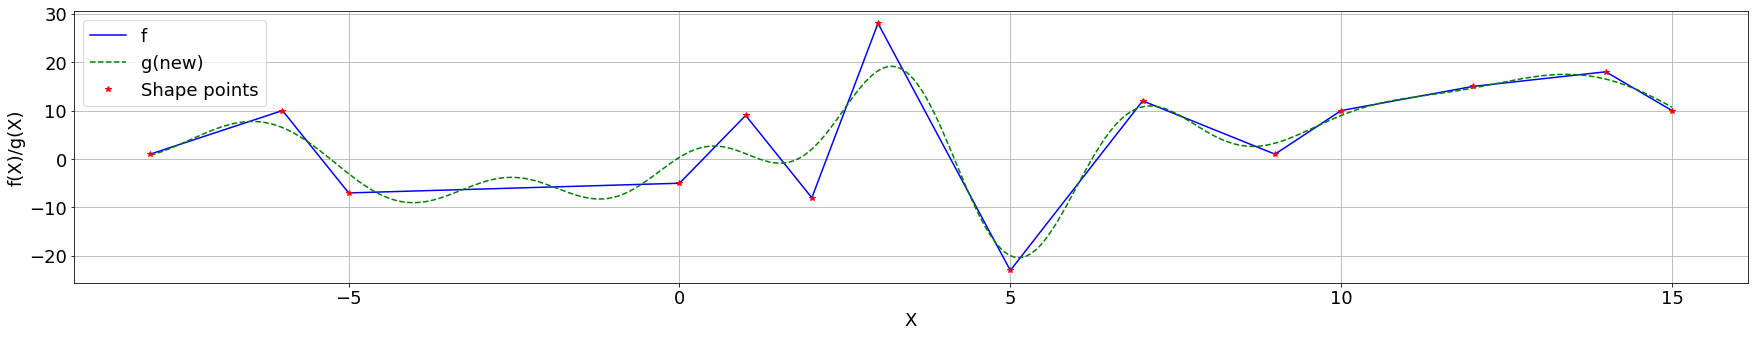

In [37]:
'''Plot comparison of f and g_best_vec'''

points_n = max(2*m, 350)
x_pts = np.linspace(x_min, x_max, points_n)

bestg_vec_2 = best_g_vec(x_pts,c_star_vec,points_n)
bestg_vec_1 = best_g_vec(x_pts,c_tilde_star_vec,points_n)


#--------------------------------------------------------------------------------------------------#

def Comparison(x,y,markersize,points_n,title, bestg_vec_1):
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(5)
    plt.plot(shape_pts[:,0],shape_pts[:,1],'b-', label = 'f')
    plt.plot(x_pts, bestg_vec_2, 'g--', label = 'g(new)')
    #plt.plot(x_pts, bestg_vec_1, 'r--', label = 'g')
    plt.plot(shape_pts[:,0], shape_pts[:,1], '*', color='red',label='Shape points')
    plt.legend(loc ="best")
    plt.xlabel('X')
    plt.ylabel('f(X)/g(X)')
    plt.rcParams.update({'font.size': 18})
    plt.grid()
    return plt

comparison = Comparison(x,y,markersize,points_n,title, bestg_vec_1)

In [38]:
'''L2 norm error'''
def f_integrand(x):
    return u(x)**2
f_integral = quad(f_integrand, x_min, x_max, limit=1000)
f_l2=np.sqrt(f_integral)

print('||f||_L2 =%10.6f'%f_l2[0])
print('quadrature error =%10.6e'%f_l2[1])

def g2_integrand(x):
    g_vec = best_g_vec(np.array([x]),c_star_vec,points_n)
    return g_vec**2


print('')

g2_integral, error = quad_vec(g2_integrand, x_min, x_max, limit=1000)
g2_integral_value_vect=np.sqrt(g2_integral)
print('||g||_L2 =', g2_integral_value_vect[0])
print('quadrature error =', error)

def f_minus_g_2_integrand(x):
    f_x = u(np.array([x]))
    g_vec = best_g_vec(np.array([x]),c_star_vec,points_n)
    return (f_x-g_vec)**2

print('')

f_minus_g_2_integral, error = quad_vec(f_minus_g_2_integrand, x_min, x_max, limit=1000)
f_minus_g_2_integral_vector = np.sqrt(f_minus_g_2_integral)
print('||f-g||_L2 =', f_minus_g_2_integral_vector[0])
print('quadrature error =', error)
r_err=(np.sqrt(f_minus_g_2_integral_vector[0])/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')

||f||_L2 = 49.507575
quadrature error =5.392697e-03

||g||_L2 = 48.23921067142659
quadrature error = 5.397100999187624e-07

||f-g||_L2 = 11.134570284791979
quadrature error = 2.7584999627191403e-06

Relative error =   6.740080 %


Positives at collocation pts =  12
Negatives at collocation pts =  10
Positives =  270
Negatives =  230


/tmp/ipykernel_33573/3375873899.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_coll, u(x_coll)-best_g_vec(x_coll,c_tilde_star_vec,22),'bx',label='collocation pts',color='red')


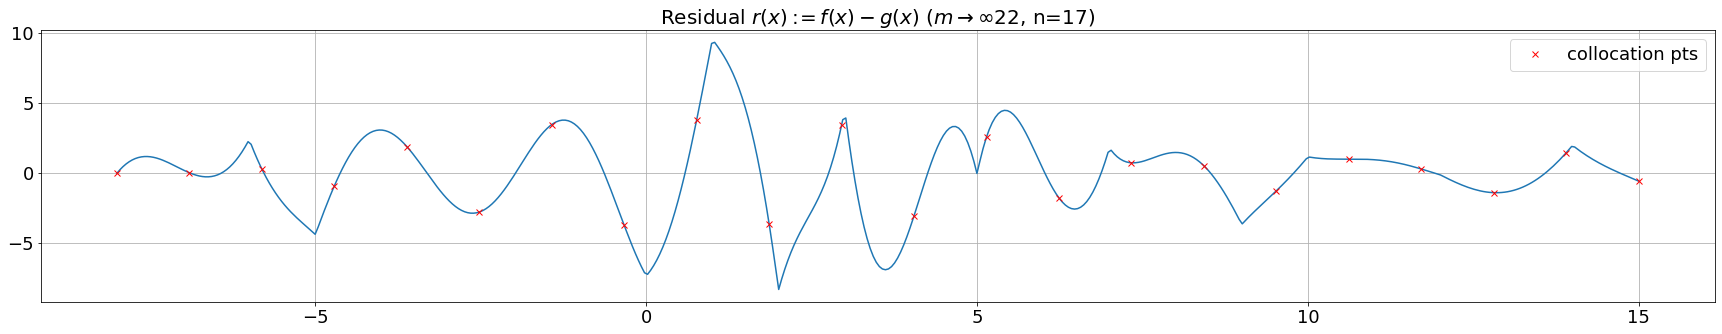

In [39]:
'''Residual of the best approximant'''
n_pts = max(3*m, 500)
x_pts = np.linspace(x_min, x_max, n_pts)

residual = u(x_pts) - best_g_vec(x_pts,c_tilde_star_vec,n_pts)
residual_collocation_pts = u(x_coll) - best_g_vec(x_coll,c_tilde_star_vec,22)
print('Positives at collocation pts = ', tuple([True for p in residual_collocation_pts if p>0]).count(True))
print('Negatives at collocation pts = ', tuple([True for p in residual_collocation_pts if p<0]).count(True))
print('Positives = ', tuple([True for p in residual if p>0]).count(True))
print('Negatives = ', tuple([True for p in residual if p<0]).count(True))
#print(g_best_vec_1) 
plt.figure(1, figsize=(30, 5))
plt.plot(x_pts, residual)
plt.plot(x_coll, u(x_coll)-best_g_vec(x_coll,c_tilde_star_vec,22),'bx',label='collocation pts',color='red')
plt.title(r'Residual $r(x) :\!\!= f(x) - g(x)$ ($m\rightarrow\infty$'+str(m)+', n='+str(len(a_tilde_mtrx[0]))+')', fontsize=20)

plt.rcParams.update({'font.size': 18})
plt.legend(loc='best')
plt.grid(True)
plt.show()

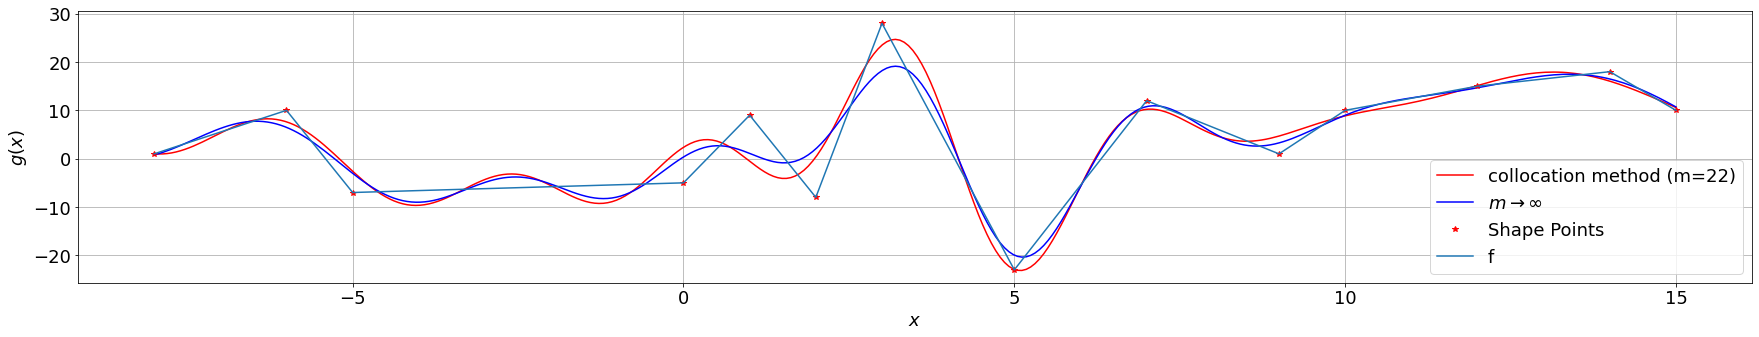

In [40]:
'''Code for comparison to collocation method'''
plt.figure(1, figsize=(30, 5))
x_pts1 = np.linspace(x_min, x_max, len(bestg_vec_1))
x_pts2 = np.linspace(x_min, x_max, len(bestg_vec_2))
plt.plot(x_pts1,bestg_vec_1,'r-', label = f'collocation method (m={str(m)})')
plt.plot(x_pts2, bestg_vec_2, 'b-', label = r'$m\rightarrow \infty$')
plt.plot(shape_pts[:,0], shape_pts[:,1],'*',color = 'red',label = 'Shape Points')
plt.plot(shape_pts[:,0], shape_pts[:,1], label = 'f')
plt.ylabel(r'$g(x)$')
plt.xlabel(r'$x$')
plt.legend(loc='best')
plt.rcParams.update({'font.size': 18})
plt.grid(True)

<span style="color:blue">**Explanation:**</span>
The error decreases as I progress from collocation approximation to continuous gram matrix approximation. This is due to the fact that by implementing integration, we are calculating the total over a continuous domain, which reduces the error.

### <span style="color:blue">[2.2)](#toa)(10 pts) Demonstrate *numerically* that the residual is a minimum. Explain.
</span><a id="a22"></a>

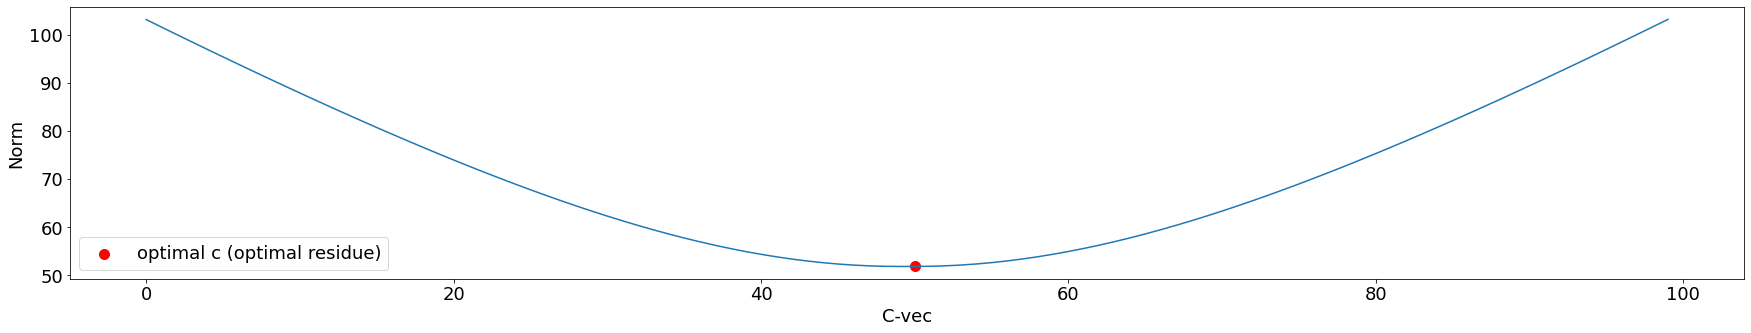

In [46]:
'''Code for minimum'''
norm1=[]

c_star_vec_new=np.zeros(len(c_star_vec))

for i in range (50):
    c_star_vec_new = c_star_vec+increment*0.1*i
    g_best_vec_i=best_g_vec(x_pts,c_star_vec_new,n_pts)
    resedue = u(x_pts)- best_g_vec(x_pts,c_star_vec_new,n_pts)
    norm1.append(norm((resedue)))
norm2=[]

c_star_vec_new2=np.zeros(len(c_star_vec))
for i in range (50):
    c_star_vec_new2 = c_star_vec-increment*0.1*i
    g_best_vec_i=best_g_vec(x_pts,c_star_vec_new2,n_pts)
    resedue = u(x_pts)- best_g_vec(x_pts,c_star_vec_new2,n_pts)
    norm2.append(norm((resedue)))
norm_das=norm2[::-1]
norm_das.extend(norm1)

plt.figure(1, figsize=(30, 5))
plt.plot(norm_das)
plt.xlabel("C-vec")
plt.ylabel("Norm")
plt.scatter(50,52,s=100,c='red',label='optimal c (optimal residue)')
plt.legend()
plt.show()



<span style="color:blue">**Explanation:**</span>
I recalculated the residues after changing the C vectors. The residue varies as I modify the c vectors from their ideal value. I also checked that my residue is little by plotting the norm of each residue.

## <span style="color:blue">[Assignment 2 (5 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>

<span style="color:blue">**Answer:**</span>